In [4]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# フィッティングについて

Pythonを用いる場合はいくつかの手法が考えられ：

- curve_fit
- numpy.polyfit : 最小二乗法を用いた polynomial fitting

求めたい目的とする多項式の関数形は $x$ に対しては非線形であるが（高次の項を含んでいる）、未知のパラメーターについては線形である。それゆえ「線形モデル」と呼ばれる。

まず初めに、non-linear least squaresを最小化する `curve_fit` を使用する。このメソッドはsum-of-squared error (二乗和誤差)を最小化する（=各係数についての微分連立方程式を解く）。

$$
E(w) = \frac{1}{2} \sum_{n=1}^{N} \{ y(x_n, w) - t_n \}^2
$$

# SciPy

## 多項式フィット

例として sin に従う分布に対して多項式フィットを行う。ここでは適当にガウス分布に従う誤差を乗せている。

使用する関数は
```python
scipy.optimize.curve_fit
```
で、最小二乗法を用いてパラメーターを最適化する。

In [42]:
# データの作成
np.random.seed(1)
N = 100
x_data = np.arange(0, 1, 1/N)
y_data = np.sin(2*np.pi*x_data) + np.random.randn(N)/5

In [43]:
from scipy.optimize import curve_fit

def func_m1(x, a, b):
    return a*x + b

def func_m3(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

popt_m1, pcov_m1 = curve_fit(func_m1, x_data, y_data)
popt_m3, pcov_m3 = curve_fit(func_m3, x_data, y_data)
# popt : フィット後のパラメーター
# pcov : poptの共分散

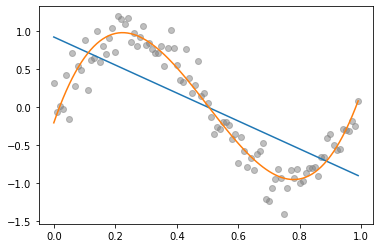

In [44]:
plt.plot(x_data, y_data, marker='o', linewidth=0, color="gray", alpha=0.5)
plt.plot(x_data, func_m1(x_data, *popt_m1))
plt.plot(x_data, func_m3(x_data, *popt_m3))
plt.show()

## ex. ガウスフィット

ガウス分布に従う乱数を生成し、その分布をフィットする。

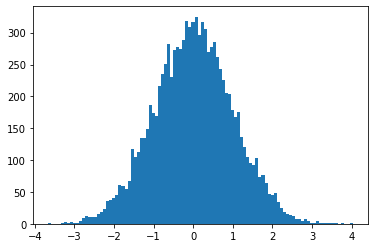

In [13]:
np.random.seed(1)
x = np.random.normal(0, 1, 10000)
plt.hist(x, bins=100)
plt.show()

In [1]:
from scipy.optimize import curve_fit

def func_m1(x, a, b):
    return a*x + b

def func_m3(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

popt_m1, pcov_m1 = curve_fit(func_m1, x_data, y_data)
popt_m3, pcov_m3 = curve_fit(func_m3, x_data, y_data)
# popt : フィット後のパラメーター
# pcov : poptの共分散

NameError: name 'x_data' is not defined

In [2]:
x = np.linspace(0, 1, 200)

# 訓練データ
np.random.seed(123)
x_data = np.linspace(0, 1, 11)
noise = np.random.randn(11)/5
y_data = np.sin(2*np.pi*x_data) + noise

NameError: name 'np' is not defined

# タンジェントでフィット

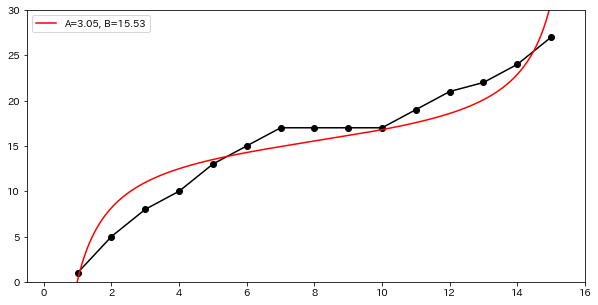

In [6]:
# フィット
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams["font.family"] = "IPAexGothic"

x_data = np.arange(1,16, 1)
xpi = (x_data-8)*np.pi/16
y_data = np.array([1, 5, 8, 10, 13, 15, 17, 17, 17, 17, 19, 21, 22, 24, 27])

def matan_v1(x, A, B):
    return A* np.tan(x) + B

a_tan, _ = curve_fit(matan_v1, xpi, y_data)

fig, ax = plt.subplots(figsize=(10,5))

plt.plot(x_data, y_data, marker="o", color="black")

x_test = np.arange(0, 16, 0.001)
xpi_test = (x_test-8)*np.pi/16
#y_test = matan_v1(xpi_test, *a_tan)
plt.plot(x_test, matan_v1(xpi_test, *a_tan), color="red", label="A={:.2f}, B={:.2f}".format(a_tan[0], a_tan[1]))

ax.set_xlim(-0.5, 16)
ax.set_ylim(0, 30)

plt.legend(loc="upper left")
plt.show()